# 2025A sparkle tests

QUESTION: does the dwell do anything

In [1]:
import os
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import signal
from importlib import reload

In [2]:
import spark_xrif as sx
dark_dir = '/opt/MagAOX/calib/camwfs-dark/'
reload(sx)

<module 'spark_xrif' from '/home/eden/code/testing/spark_xrif.py'>

In [3]:
import fixr
import lookyloo
from lookyloo.core import get_matching_paths
import datetime

In [4]:
# feq 2000 EM gain ?
lab_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_1.000000_-45.000000__T20250419020425366799769.fits'
#freq 2000 EMGain 595
sky_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_595.000000_-45.000000__T20250420001026277139922.fits'

# CHECK: observations here

In [ ]:
# feq 2000 EM gain ?
lab_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_1.000000_-45.000000__T20250419020425366799769.fits'
#freq 2000 EMGain 595
sky_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_595.000000_-45.000000__T20250420001026277139922.fits'


In [15]:
# setup the keywords for this observation
obs_2khz_035amp = ['sparkles_amp035_sep20_ang45',
'sparkles_amp035_sep20_ang45_delay_295',
'sparkles_amp035_sep20_ang45_delay_290',
'sparkles_amp035_sep20_ang45_delay_300']

######### OBS INFO
obs_plot_name = 'Lab dwell tests 2kHz'
sprk_type = 'amp 0.035 sep 20 ang 45'
obs_name = obs_2khz_035amp[0]
obs_idx = 0

######### LAB INFO
lab_name = 'sparkles_amp05_sep20_ang45'

#### The location to save it to

In [16]:
# check to see what is in each observation
dt_start = datetime.datetime(2025, 4, 15, tzinfo=datetime.timezone.utc)
obs_span = sx.verify_obs(obs_name, dt_start, n=obs_idx)

['2025-04-19 23:32:49.149702+00:00 \n', '2025-04-19 23:39:43.373667+00:00 \n', '2025-04-19 23:46:54.547742+00:00 \n', '2025-04-19 23:48:55.530529+00:00 \n']


## 2kHz delay test 0.5 amp

In [ ]:
['sparkles_amp05_sep20_ang45_delay_295']

## 3kHz delay test


# CELLS TO RUN

Once the above are set, you can go a head and run the following cells

In [37]:
mask_data = fits.open(sx.glob_dir_calib + sx.glob_mask)[0].data
mask_nan = mask_data.copy()
mask_nan[mask_nan == 0] = np.nan

In [35]:
def lab_stack_check(lab_obs_span, n = 1024, n_start = 0):
    """ 
    Processing the lab stacks, trying to see which 
    """
    file_lists = sx.gen_file_list(lab_obs_span)
    # LAB+TRUE for file sampling, so using the Lab dark!
    data_ar, timing_ar = sx.pull_n_files(file_lists, n, n_start=n_start)
    #TODO: subtract dark
    # generate a mean for each split
    data_splt = sx.split_data(data_ar)
    mean_splts_arr = np.array([np.nanmean(d_splt, axis=0) for d_splt in data_splt])
    mean_all = np.average(mean_splts_arr, axis=0)
    # Gen labref
    mean_splts_sub = [mean - mean_all for mean in mean_splts_arr]
    #TODO: Check to make sure this is continuos 
    return mean_splts_sub, mean_all

## 2KHz delay test

amplitude 0.035

In [ ]:
obs_2khz_035amp = ['sparkles_amp035_sep20_ang45',
'sparkles_amp035_sep20_ang45_delay_295',
'sparkles_amp035_sep20_ang45_delay_290',
'sparkles_amp035_sep20_ang45_delay_300']

#### delay 0

In [47]:
obs_name = obs_2khz_035amp[0]
obs_span = sx.verify_obs(obs_name, dt_start, n=obs_idx)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-19 23:32:49.149702+00:00 \n', '2025-04-19 23:39:43.373667+00:00 \n', '2025-04-19 23:46:54.547742+00:00 \n', '2025-04-19 23:48:55.530529+00:00 \n']
OBS: sparkles_amp035_sep20_ang45 
 	 START:	 2025-04-19 23:32:49.149702+00:00 
 	 END:	 2025-04-19 23:38:09.007971+00:00 
 	 LENGTH:	0:05:19.858269 


In [48]:
mean_splts_sub, mean_all = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 78
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907231 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118906893 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45  \n bg sub LAB sparkles, 1024 frames')

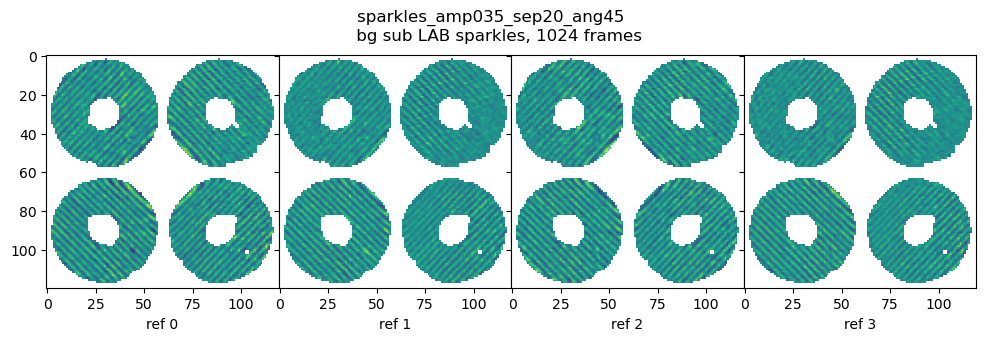

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(mean_splts_sub[e]*mask_nan, vmax = np.max(mean_splts_sub), vmin = np.min(mean_splts_sub))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

#### delay 295

In [ ]:
n_obs = 1
obs_span = sx.verify_obs(obs_2khz_035amp[n_obs], dt_start, n=obs_idx)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-19 23:39:43.373667+00:00 \n']
OBS: sparkles_amp035_sep20_ang45_delay_295 
 	 START:	 2025-04-19 23:39:43.373667+00:00 
 	 END:	 2025-04-19 23:45:23.881214+00:00 
 	 LENGTH:	0:05:40.507547 


In [52]:
mean_splts_sub_1, mean_all_1 = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 83
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907504 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907150 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  

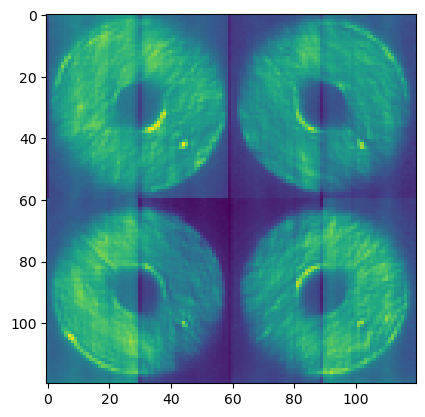

In [75]:
plt.imshow(mean_all_1)

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_295  \n bg sub LAB sparkles, 1024 frames')

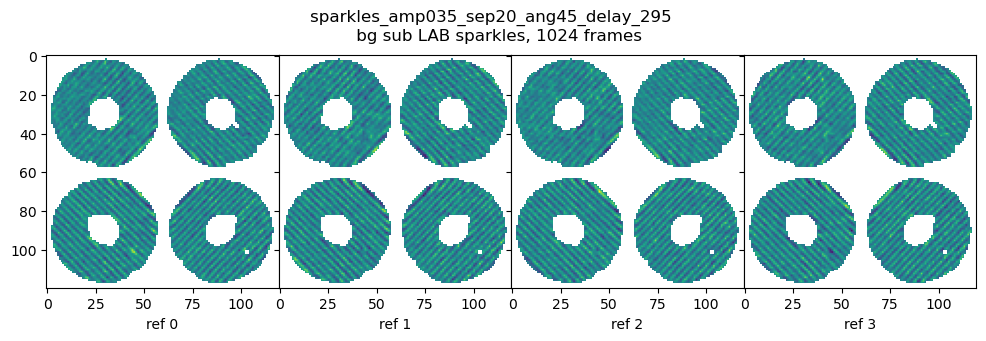

In [53]:
plt_list = mean_splts_sub_1

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(plt_list[e]*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_290 DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames')

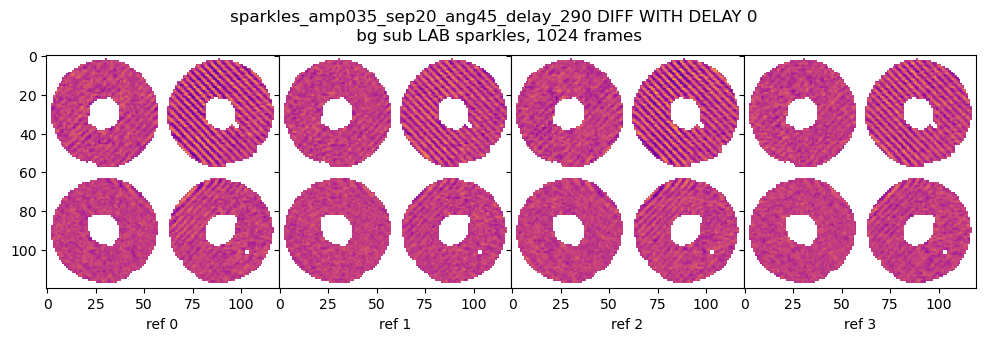

In [ ]:
# PLOT: difference with delay 0
plt_list = mean_splts_sub_1

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow((mean_splts_sub[(e+1)%4]-plt_list[e])*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list), cmap='plasma')
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title} DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

#### Delay 290

In [60]:
n_obs = 2
obs_span = sx.verify_obs(obs_2khz_035amp[n_obs], dt_start, n=obs_idx)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-19 23:46:54.547742+00:00 \n']
OBS: sparkles_amp035_sep20_ang45_delay_290 
 	 START:	 2025-04-19 23:46:54.547742+00:00 
 	 END:	 2025-04-19 23:48:06.764743+00:00 
 	 LENGTH:	0:01:12.217001 


In [61]:
mean_splts_sub_2, mean_all_2 = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 18
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907227 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907378 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  

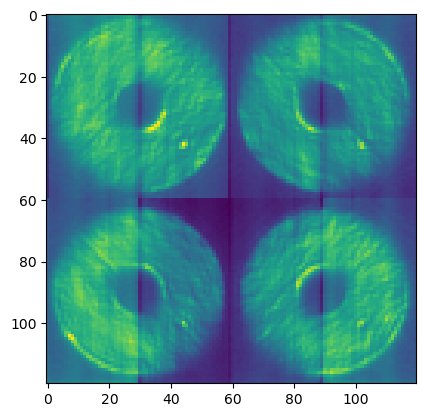

In [74]:
plt.imshow(mean_all_2)

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_290  \n bg sub LAB sparkles, 1024 frames')

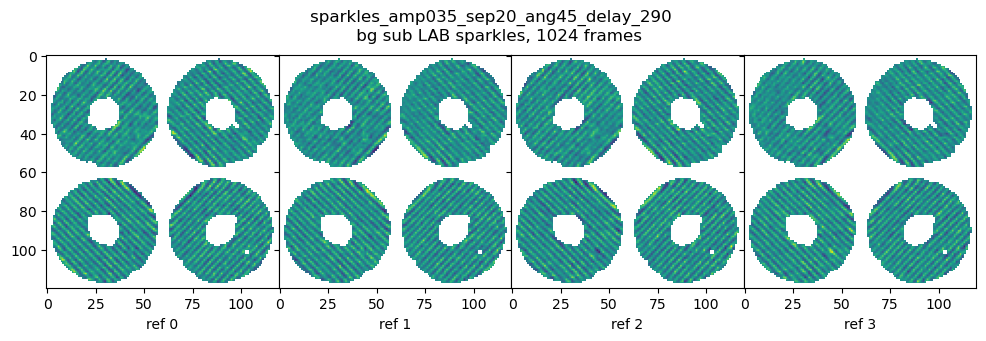

In [62]:
plt_list = mean_splts_sub_2

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(plt_list[e]*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_290 DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames')

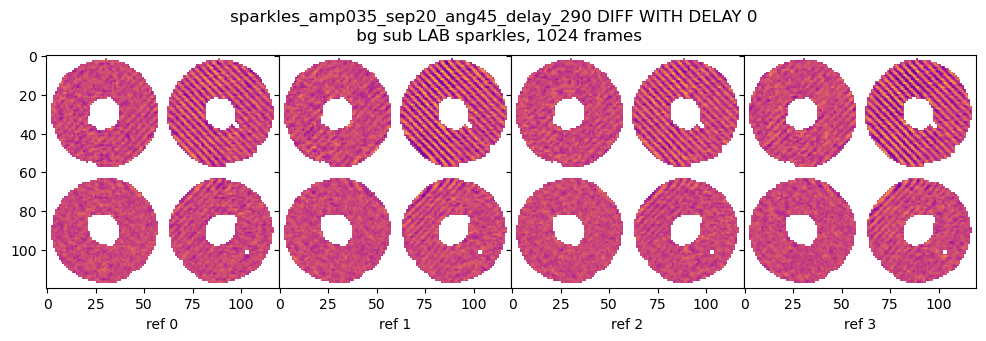

In [ ]:
# PLOT: difference with delay 0
plt_list = mean_splts_sub_2

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow((mean_splts_sub[(e+2)%4]-plt_list[e])*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list), cmap='plasma')
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title} DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames", y=0.90)

#### delay 300

In [68]:
n_obs = 3
obs_span = sx.verify_obs(obs_2khz_035amp[n_obs], dt_start, n=obs_idx)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-19 23:48:55.530529+00:00 \n']
OBS: sparkles_amp035_sep20_ang45_delay_300 
 	 START:	 2025-04-19 23:48:55.530529+00:00 
 	 END:	 2025-04-19 23:50:32.619743+00:00 
 	 LENGTH:	0:01:37.089214 


In [69]:
mean_splts_sub_3, mean_all_3 = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 23
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907437 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       118907306 bytes
  ratio:              0.504

xrif compression details:
  difference method:  none
  reorder method:     none
  

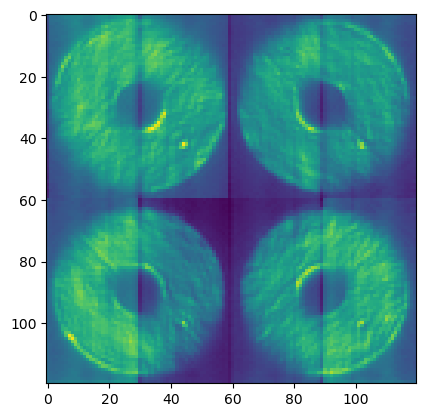

In [73]:
plt.imshow(mean_all_3)

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_300  \n bg sub LAB sparkles, 1024 frames')

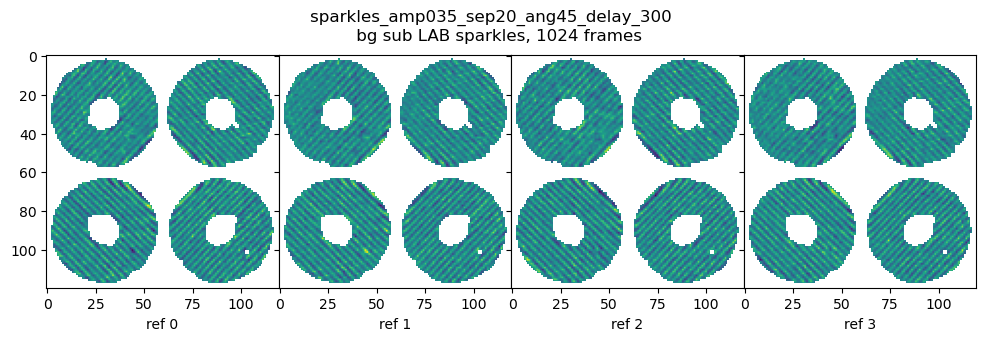

In [ ]:
# PLOT: cleaned files
plt_list = mean_splts_sub_3

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(plt_list[e]*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

Text(0.5, 0.9, 'sparkles_amp035_sep20_ang45_delay_300 DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames')

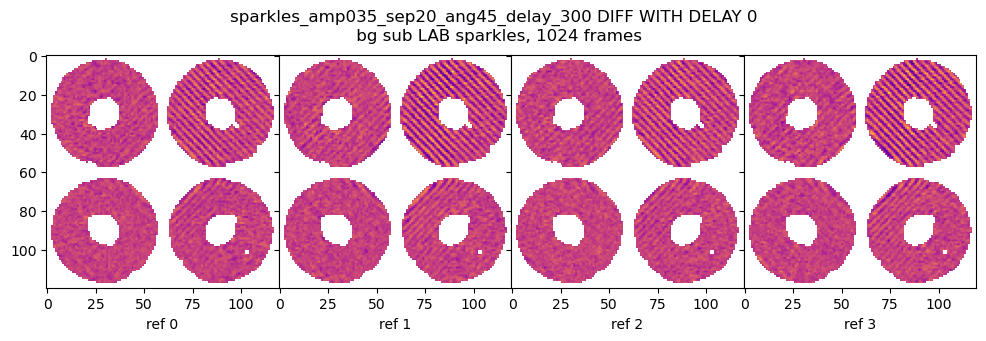

In [ ]:
# PLOT: difference with delay 0
plt_list = mean_splts_sub_3

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow((mean_splts_sub[(e+4)%4]-plt_list[e])*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list), cmap='plasma')
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title} DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames", y=0.90)

## 3kHz tests - want to prove it's weird

In [78]:
obs_span = sx.verify_obs('sparkles_3kHz_amp035_sep20', dt_start, n=0)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-20 19:30:57.993346+00:00 \n', '2025-04-20 19:33:27.702659+00:00 \n']
OBS: sparkles_3kHz_amp035_sep20 
 	 START:	 2025-04-20 19:30:57.993346+00:00 
 	 END:	 2025-04-20 19:32:36.030410+00:00 
 	 LENGTH:	0:01:38.037064 


In [79]:
mean_splts_sub, mean_all = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 36
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       127374469 bytes
  ratio:              0.540

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       127358982 bytes
  ratio:              0.540

xrif compression details:
  difference method:  none
  reorder method:     none
  

Text(0.5, 1.0, 'sparkles_3kHz_amp035_sep20_delay295\n average of all lab frames')

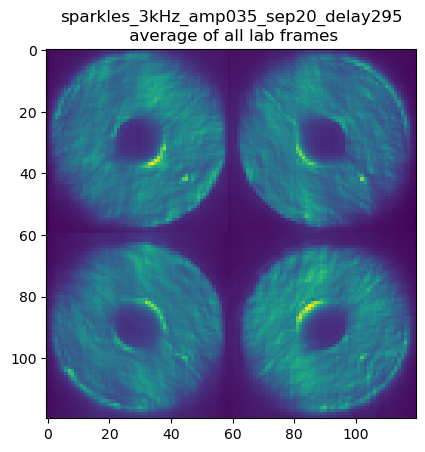

In [93]:
plt.imshow(mean_all)
plt.title(f'{obs_span.title}\n average of all lab frames')

Text(0.5, 0.9, 'sparkles_3kHz_amp035_sep20  \n bg sub LAB sparkles, 1024 frames')

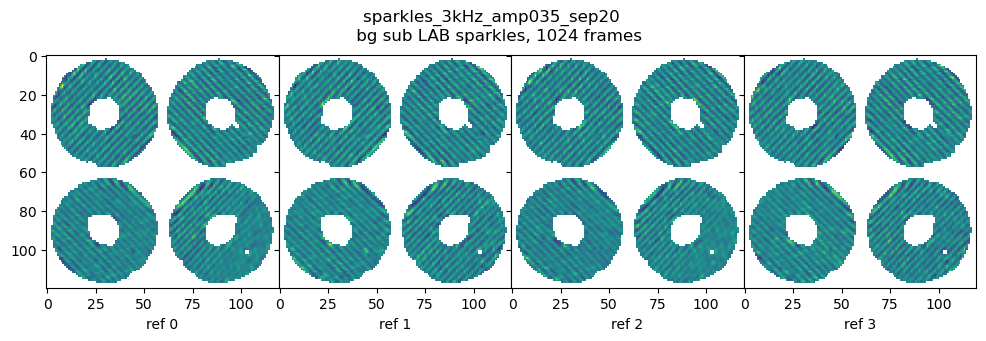

In [83]:
# PLOT: cleaned files
plt_list = mean_splts_sub

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(plt_list[e]*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

#### delay 295

In [84]:
obs_span = sx.verify_obs('sparkles_3kHz_amp035_sep20', dt_start, n=1)
print(f"OBS: {obs_span.title} \n \t START:\t {obs_span.begin} \n \t END:\t {obs_span.end} \n \t LENGTH:\t{obs_span.end - obs_span.begin} ")

['2025-04-20 19:30:57.993346+00:00 \n', '2025-04-20 19:33:27.702659+00:00 \n']
OBS: sparkles_3kHz_amp035_sep20_delay295 
 	 START:	 2025-04-20 19:33:27.702659+00:00 
 	 END:	 2025-04-20 19:35:19.464103+00:00 
 	 LENGTH:	0:01:51.761444 


In [85]:
mean_splts_sub_d, mean_all_d = lab_stack_check(obs_span)

PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 41
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       126536679 bytes
  ratio:              0.536

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 8192
  raw size:           327680 bytes
  encoded size:       327680 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 8192
  raw size:           235929600 bytes
  encoded size:       126479948 bytes
  ratio:              0.536

xrif compression details:
  difference method:  none
  reorder method:     none
  

Text(0.5, 1.0, 'sparkles_3kHz_amp035_sep20_delay295 \n average of all lab frames')

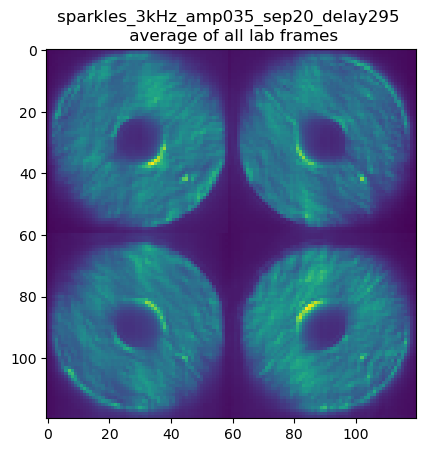

In [92]:
plt.imshow(mean_all_d)
plt.title(f'{obs_span.title} \n average of all lab frames')

Text(0.5, 0.9, 'sparkles_3kHz_amp035_sep20_delay295  \n bg sub LAB sparkles, 1024 frames')

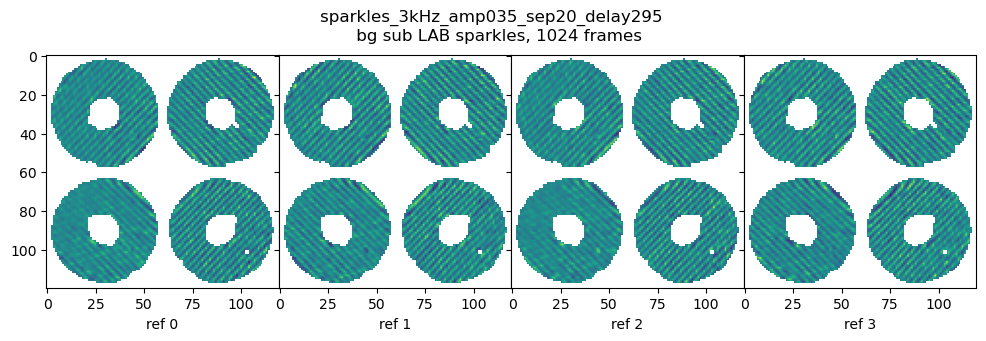

In [87]:
# PLOT: cleaned files
plt_list = mean_splts_sub_d

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow(plt_list[e]*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list))
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title}  \n bg sub LAB sparkles, 1024 frames", y=0.90)
#plt.savefig(obs_save_file + '_lab_ref_set')

Text(0.5, 0.9, 'sparkles_3kHz_amp035_sep20_delay295 DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames')

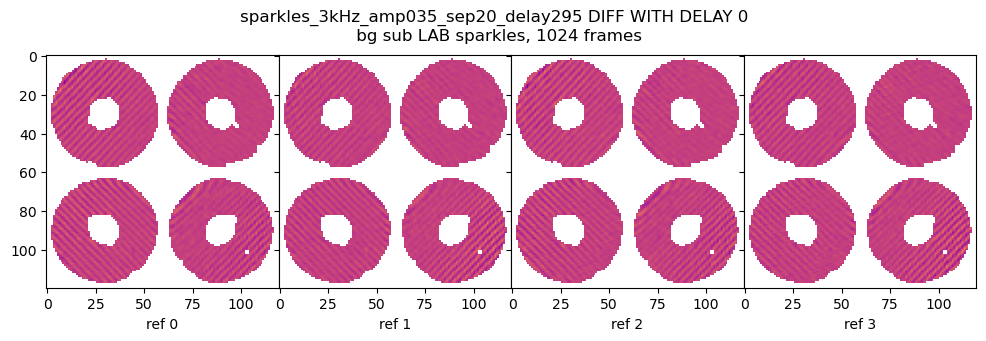

In [91]:
# PLOT: difference with delay 0
plt_list = mean_splts_sub_d

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

for e in range(4):
    axs[e].imshow((mean_splts_sub[(e+3)%4]-plt_list[e])*mask_nan, vmax = np.max(plt_list), vmin = np.min(plt_list), cmap='plasma')
    axs[e].set_xlabel(f'ref {e}')

plt.suptitle(f"{obs_span.title} DIFF WITH DELAY 0 \n bg sub LAB sparkles, 1024 frames", y=0.90)